In [1]:
import os
# running from Root directory
os.chdir("..")

In [2]:
from connectome import Connectome
from connectome_network import ConnectomeNetwork
from connectome_types import SynapseSide, cell_types, ClfType, m_types, CONNECTOME_NEURON_TABLE_PATH
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from collections import Counter
clf_type_space = [e.value for e in ClfType]

In [3]:
neurons_df = pd.read_csv(CONNECTOME_NEURON_TABLE_PATH)
print(len(neurons_df))
neurons_df.head()

71736


,Unnamed: 0,volume,clf_type,cell_type,mtype,pre_synapses,post_synapses,ds_num_of_post_synapses,ds_num_of_pre_synapses,ds_pre_syn_weight,root_id,pre_syn_weight,ex_pre_syn_weight,inh_pre_syn_weight
0,0,234.475029,E,6P-IT,L6tall-c,1,0,3,50,4245.760000,864691134784325628,1096.000000,1096.000000,NaN
1,1,313.159680,E,6P-IT,L6tall-c,0,1,4,68,4804.588235,864691134807855033,NaN,NaN,NaN
2,2,318.771200,E,6P-IT,L6short-a,50,5,9,1661,6338.362432,864691134884743162,5991.680000,6356.888889,5562.956522
3,3,207.237120,E,6P-IT,L6short-b,25,17,28,659,7949.116844,864691134884747514,4935.680000,5514.800000,2619.200000
4,4,205.180109,E,6P-CT,L6tall-a,95,330,557,1779,6489.351321,864691134884754426,5751.284211,5548.327869,6115.411765


In [105]:
ex_color = "#0072BD" #blue 
inh_color = "#FF0000" # red, dark red: "#A2142F"

# cell types colors
cell_types = sorted(neurons_df['cell_type'].unique())
blue_cmap = plt.cm.Blues(np.linspace(0.5, 1, 7))
red_cmap = plt.cm.Reds(np.linspace(0.6, 0.9, 4))
custom_palette = {cell_type: color for cell_type, color in zip(cell_types[:7], blue_cmap)}
custom_palette.update({cell_type: color for cell_type, color in zip(cell_types[7:], red_cmap)})

In [5]:
# neurons_df[neurons_df.cell_type == 'MC'].mtype.value_counts()
# neurons_df[neurons_df.cell_type == 'BC'].mtype.value_counts()

In [106]:
neurons_df_sorted = neurons_df.sort_values('cell_type')

### Neuron type distribution

Ex neurons: 63904
Inh neurons: 7832
E/I ratio: 89.08 %


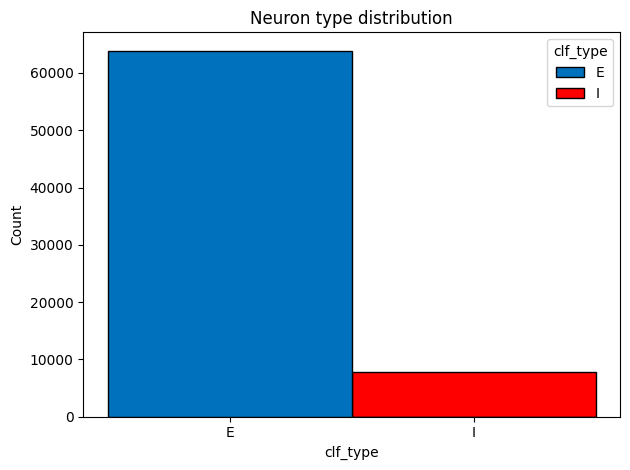

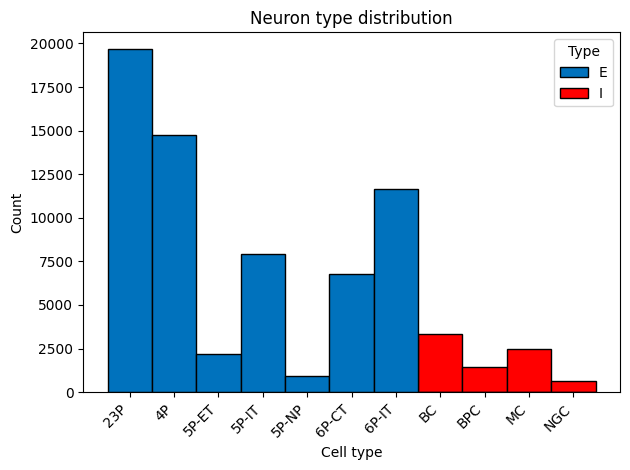

In [107]:
ex_neurons = len(neurons_df[neurons_df.clf_type == 'E'])
inh_neurons = len(neurons_df[neurons_df.clf_type == 'I'])

print(f'Ex neurons: {ex_neurons}')
print(f'Inh neurons: {inh_neurons}')
print(f'E/I ratio: {100*ex_neurons/(inh_neurons+ex_neurons):.2f} %')

fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="clf_type", hue="clf_type", 
             palette={"I": inh_color, "E": ex_color}, alpha=1, ax=ax)
ax.set_title("Neuron type distribution");
plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.histplot(data=neurons_df_sorted, x="cell_type", hue="clf_type", 
             palette={"I": inh_color, "E": ex_color}, alpha=1, ax=ax)
ax.set_title("Neuron type distribution");plt.xticks(rotation=45, ha='right');
ax.set_xlabel("Cell type")
sns.move_legend(ax, title='Type', loc='best')
plt.tight_layout();plt.show()
# fig.savefig('figures/neuron_type_dist.png')

### Degree distribution (Number of synapses)
whole dataset: 300M synapses 

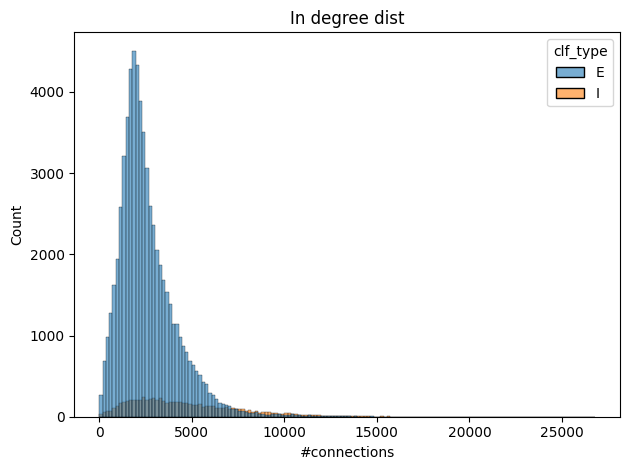

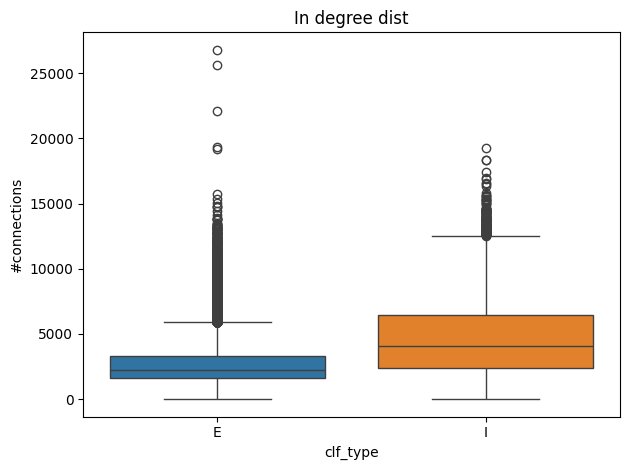

In [125]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="ds_num_of_pre_synapses", hue="clf_type",bins=150,
             alpha=0.6, ax=ax)
ax.set_title("In degree dist");
ax.set_xlabel("#connections");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.boxplot(x="clf_type", y="ds_num_of_pre_synapses", hue="clf_type", data=neurons_df)
plt.title("In degree dist")
plt.ylabel("#connections")
plt.tight_layout();plt.show()

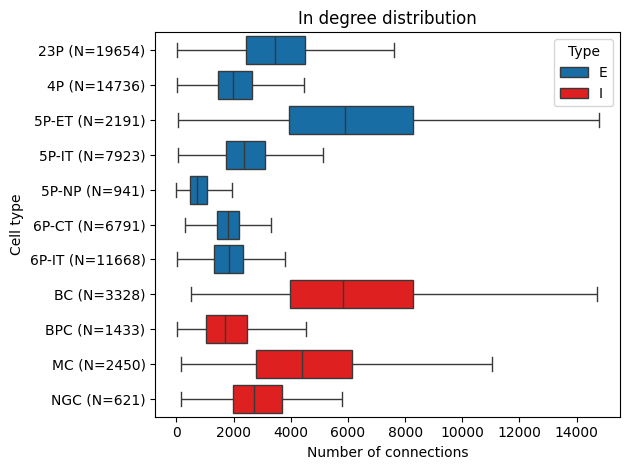

In [136]:
cell_type_counts = neurons_df_sorted['cell_type'].value_counts()
cell_type_counts_labels = [f"{ct} (N={cell_type_counts[ct]})" for ct in neurons_df_sorted['cell_type'].unique()]

fig, ax = plt.subplots()
sns.boxplot(y="cell_type", x="ds_num_of_pre_synapses", hue="clf_type", data=neurons_df_sorted,
            palette={"I": inh_color, "E": ex_color}, showfliers=False)
plt.title("In degree distribution")
plt.xlabel("Number of connections"); plt.ylabel("Cell type"); 

ax.set_yticks(range(len(cell_type_counts_labels)))
ax.set_yticklabels(cell_type_counts_labels)

sns.move_legend(ax, title='Type', loc='best')
plt.tight_layout();plt.show(); 
# fig.savefig('figures/in_degree_dist.png')

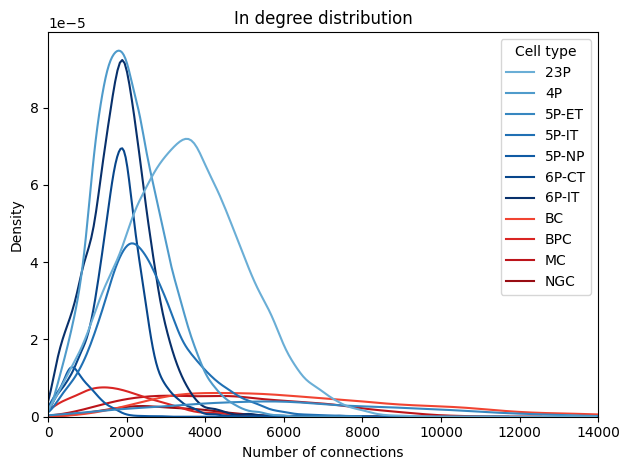

In [133]:
# supplementary materials 

# fig, ax = plt.subplots()
# sns.histplot(data=neurons_df_sorted, x="ds_num_of_pre_synapses", hue="cell_type",bins=50,binrange=(0, 15000),
#              alpha=0.6, ax=ax, palette=custom_palette)
# ax.set_title("In degree distribution");
# ax.set_xlabel("Number of connections");
# sns.move_legend(ax, title='Cell type', loc='best')
# plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.kdeplot(data=neurons_df_sorted, x="ds_num_of_pre_synapses", hue="cell_type", ax=ax,
            palette=custom_palette, alpha=1)
ax.set_xlim(0, 14000)
ax.set_title("In degree distribution");
ax.set_xlabel("Number of connections"); sns.move_legend(ax, title='Cell type', loc='best')
plt.tight_layout();plt.show()

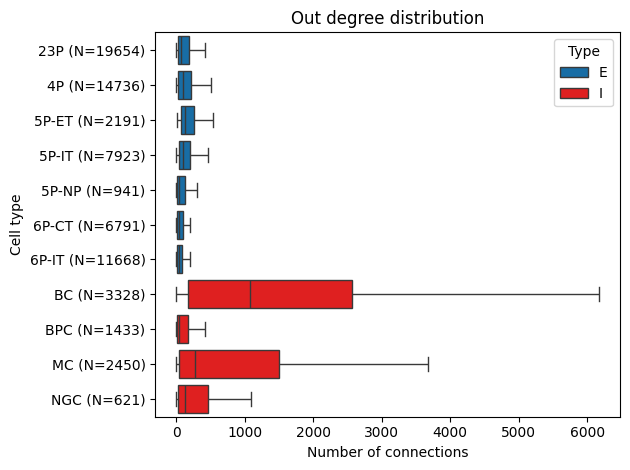

In [137]:
fig, ax = plt.subplots()
sns.boxplot(y="cell_type", x="ds_num_of_post_synapses", hue="clf_type", data=neurons_df_sorted,
            palette={"I": inh_color, "E": ex_color}, showfliers=False)
plt.title("Out degree distribution")
plt.xlabel("Number of connections"); plt.ylabel("Cell type"); 
sns.move_legend(ax, title='Type', loc='best')
ax.set_yticks(range(len(cell_type_counts_labels)))
ax.set_yticklabels(cell_type_counts_labels)
plt.tight_layout();plt.show()
# fig.savefig('figures/out_degree_dist.png')

### Sum of pre-synaptic weights (Means)

In [126]:
# fig, ax = plt.subplots()
# sns.histplot(data=neurons_df, x="ds_pre_syn_weight", hue="clf_type",bins=150,
#              alpha=0.6, ax=ax)
# ax.set_title("Mean of Sum of incoming synpatic weights/size ");
# ax.set_xlabel("mean weight");ax.set_ylabel("Count")
# plt.tight_layout();plt.show()
# # norm this hist - probabilites, fix the diff in height. 

# fig, ax = plt.subplots()
# sns.boxplot(x="clf_type", y="ds_pre_syn_weight", hue="clf_type", data=neurons_df)
# plt.title("Mean of Sum of incoming synpatic weights/size  (whole dataset synapses ~ 300M)")
# plt.ylabel("mean weight")
# plt.tight_layout();plt.show()

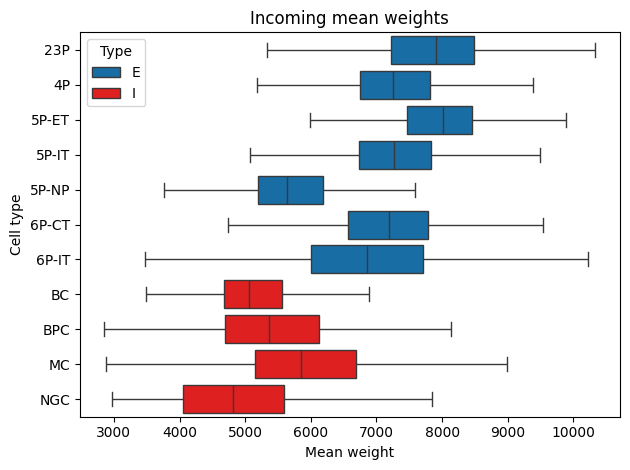

In [139]:
# fig, ax = plt.subplots()
# sns.histplot(data=neurons_df, x="ds_pre_syn_weight", hue="cell_type",bins=150,
#              alpha=0.6, ax=ax)
# ax.set_title("Mean of Sum of incoming synpatic weights/size ");
# ax.set_xlabel("mean weight");ax.set_ylabel("Count")
# plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.boxplot(y="cell_type", x="ds_pre_syn_weight", hue="clf_type", data=neurons_df_sorted,
            palette={"I": inh_color, "E": ex_color}, showfliers=False)
sns.move_legend(ax, title='Type', loc='best')
plt.ylabel("Cell type"); plt.xlabel("Mean weight"); 
plt.title("Incoming mean weights")
plt.tight_layout();plt.show()
# fig.savefig('figures/in_weight.png')

In [141]:
neurons_df_sorted.head()

,Unnamed: 0,volume,clf_type,cell_type,mtype,pre_synapses,post_synapses,ds_num_of_post_synapses,ds_num_of_pre_synapses,ds_pre_syn_weight,root_id,pre_syn_weight,ex_pre_syn_weight,inh_pre_syn_weight
35867,35867,254.501683,E,23P,L3b,422,126,170,3029,7990.738858,864691135782237008,5757.800948,7605.411765,5291.786350
16236,16236,316.713533,E,23P,L2b,31,1,7,1029,7519.164237,864691135463522461,5519.096774,8612.000000,4617.000000
54647,54647,268.349604,E,23P,L3a,17,6,27,771,8916.373541,864691136148686743,7362.823529,10029.000000,4992.888889
54645,54645,355.650437,E,23P,L3b,9,4,8,790,7068.207595,864691136148350545,6637.333333,4743.200000,9005.000000
16233,16233,266.186424,E,23P,L2b,34,73,96,2088,6900.342912,864691135463519301,5209.529412,8294.800000,3924.000000


ValueError: Could not interpret value `ds_post_syn_weight` for `x`. An entry with this name does not appear in `data`.

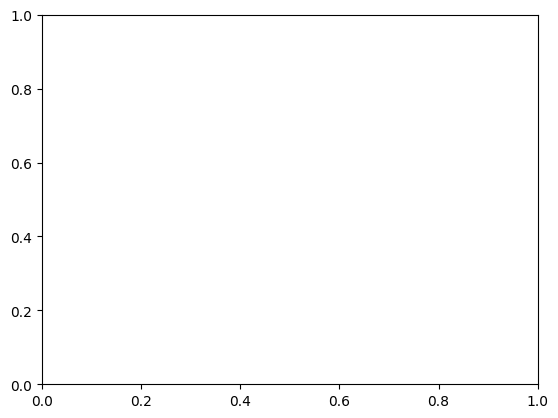

In [140]:
fig, ax = plt.subplots()
sns.boxplot(y="cell_type", x="ds_post_syn_weight", hue="clf_type", data=neurons_df_sorted,
            palette={"I": inh_color, "E": ex_color}, showfliers=False)
sns.move_legend(ax, title='Type', loc='best')
plt.ylabel("Cell type"); plt.xlabel("Mean weight"); 
plt.title("Outgoing mean weights")
plt.tight_layout();plt.show()
fig.savefig('figures/out_weight.png')

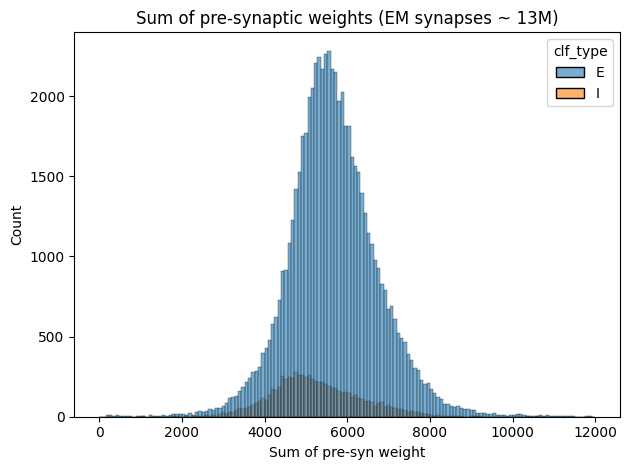

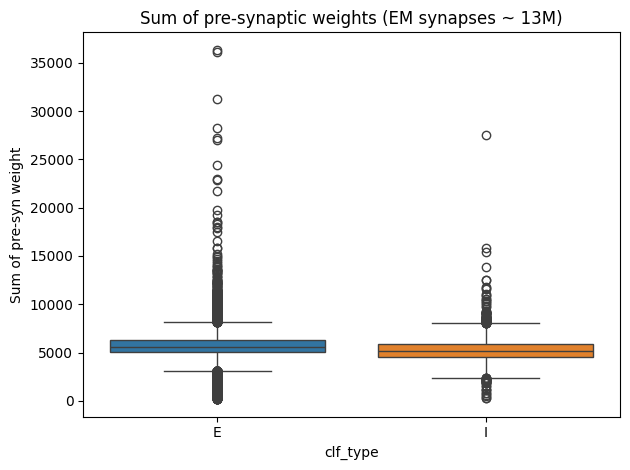

In [40]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="pre_syn_weight", hue="clf_type",bins=150,
             alpha=0.6, ax=ax, binrange=(0, 12000))
ax.set_title("Sum of pre-synaptic weights (EM synapses ~ 13M)");
ax.set_xlabel("Sum of pre-syn weight");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.boxplot(x="clf_type", y="pre_syn_weight", hue="clf_type", data=neurons_df)
plt.title("Sum of pre-synaptic weights (EM synapses ~ 13M)")
plt.ylabel("Sum of pre-syn weight")
plt.tight_layout();plt.show()

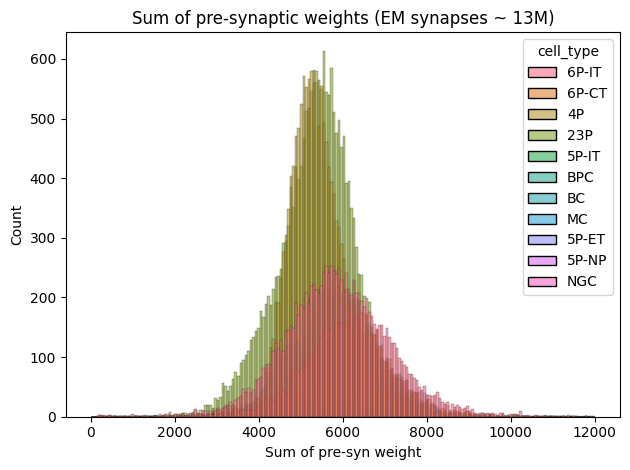

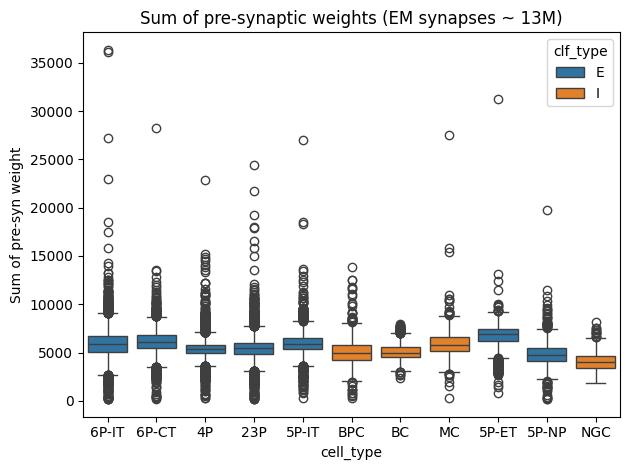

In [41]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="pre_syn_weight", hue="cell_type",bins=200,
             alpha=0.6, ax=ax, binrange=(0, 12000))
ax.set_title("Sum of pre-synaptic weights (EM synapses ~ 13M)");
ax.set_xlabel("Sum of pre-syn weight");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.boxplot(x="cell_type", y="pre_syn_weight", hue="clf_type", data=neurons_df)
plt.title("Sum of pre-synaptic weights (EM synapses ~ 13M)")
plt.ylabel("Sum of pre-syn weight")
plt.tight_layout();plt.show()

#### Special featurs the EM has: we can look at "labeled" weights, i.e.: from excitatory, inhibitory, from BC...

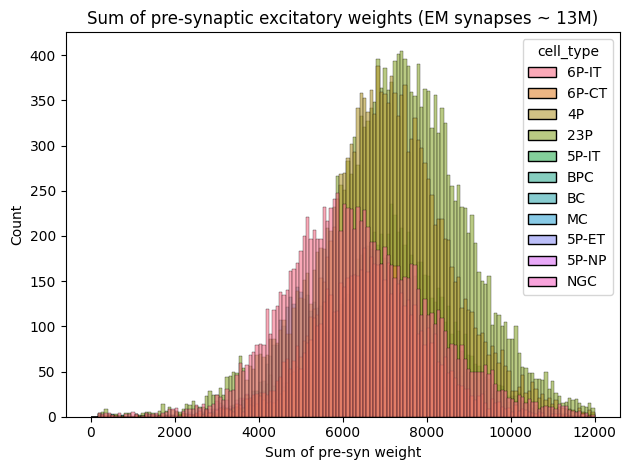

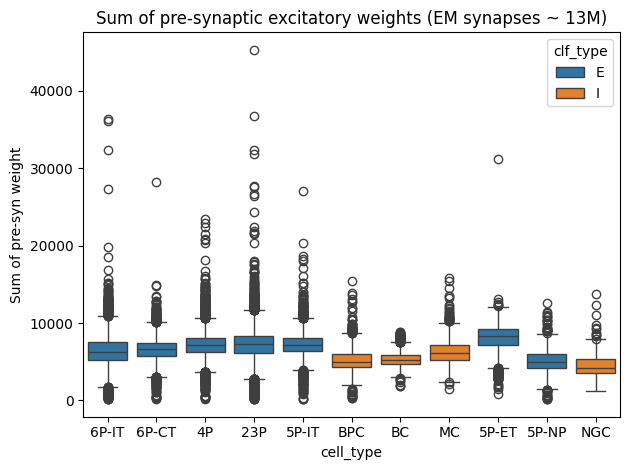

In [44]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="ex_pre_syn_weight", hue="cell_type",bins=150,
             alpha=0.6, ax=ax, binrange=(0, 12000))
ax.set_title("Sum of pre-synaptic excitatory weights (EM synapses ~ 13M)");
ax.set_xlabel("Sum of pre-syn weight");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.boxplot(x="cell_type", y="ex_pre_syn_weight", hue="clf_type", data=neurons_df)
plt.title("Sum of pre-synaptic excitatory weights (EM synapses ~ 13M)")
plt.ylabel("Sum of pre-syn weight")
plt.tight_layout();plt.show()

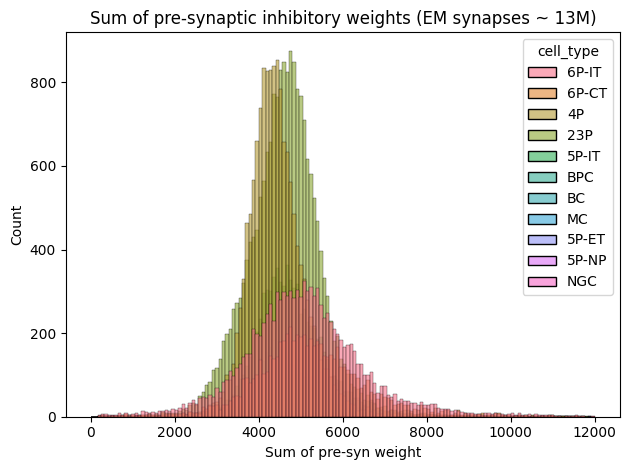

In [43]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="inh_pre_syn_weight", hue="cell_type",bins=150,
             alpha=0.6, ax=ax, binrange=(0, 12000))
ax.set_title("Sum of pre-synaptic inhibitory weights (EM synapses ~ 13M)");
ax.set_xlabel("Sum of pre-syn weight");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

### Volume

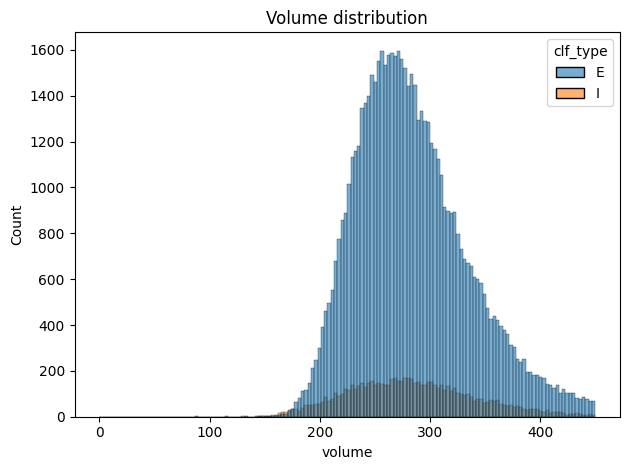

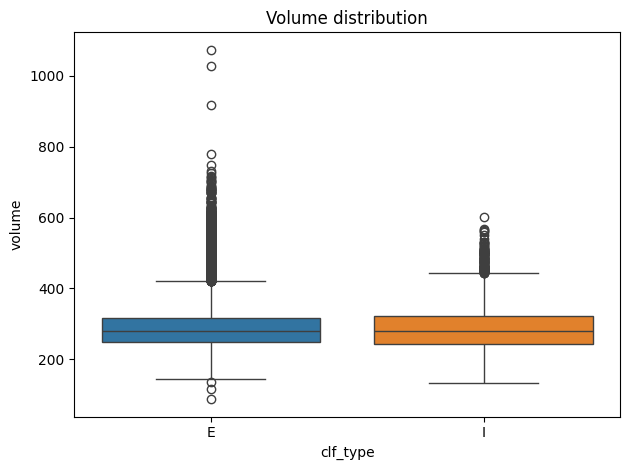

In [48]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="volume", hue="clf_type",bins=150,binrange=(0, 450),
             alpha=0.6, ax=ax)
ax.set_title("Volume distribution");
ax.set_xlabel("volume");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.boxplot(x="clf_type", y="volume", hue="clf_type", data=neurons_df)
plt.title("Volume distribution")
plt.ylabel("volume")
plt.tight_layout();plt.show()

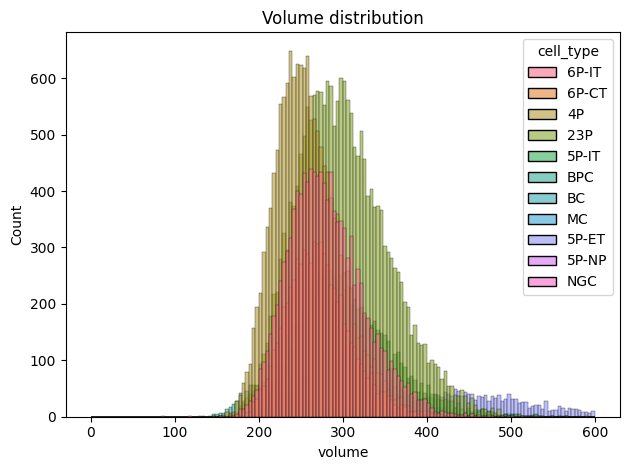

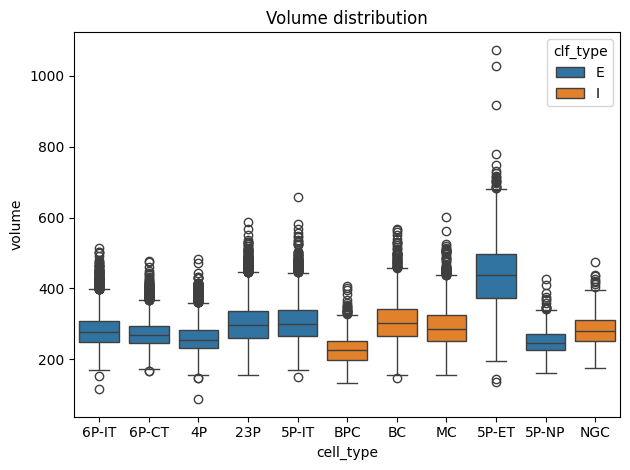

In [50]:
fig, ax = plt.subplots()
sns.histplot(data=neurons_df, x="volume", hue="cell_type",bins=150,binrange=(0, 600),
             alpha=0.6, ax=ax)
ax.set_title("Volume distribution");
ax.set_xlabel("volume");ax.set_ylabel("Count")
plt.tight_layout();plt.show()

fig, ax = plt.subplots()
sns.boxplot(x="cell_type", y="volume", hue="clf_type", data=neurons_df)
plt.title("Volume distribution")
plt.ylabel("volume")
plt.tight_layout();plt.show()

### pre-synaptic weights vs. num of pre-synapses

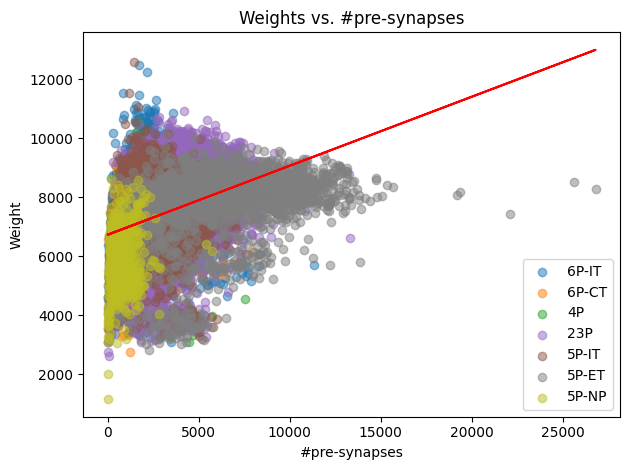

In [71]:
def weight_v_num_of_pre(df, color):
    X = df['ds_num_of_pre_synapses']
    y = df['ds_pre_syn_weight']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    unique_types = df[color].unique()
    color_map = plt.colormaps['tab10']
    color_dict = {t: color_map(i/len(unique_types)) for i, t in enumerate(unique_types)}
    for t in unique_types:
        mask = df[color] == t
        plt.scatter(df.loc[mask, 'ds_num_of_pre_synapses'], 
                    df.loc[mask, 'ds_pre_syn_weight'], 
                    alpha=0.5, 
                    c=[color_dict[t]], 
                    label=t)
    
    plt.plot(df['ds_num_of_pre_synapses'], model.predict(X), color='red')
    plt.title("Weights vs. #pre-synapses"); plt.ylabel("Weight"); plt.xlabel("#pre-synapses");
    plt.tight_layout();plt.legend(); plt.show()


weight_v_num_of_pre(neurons_df[neurons_df['clf_type'] == 'E'], color='cell_type')

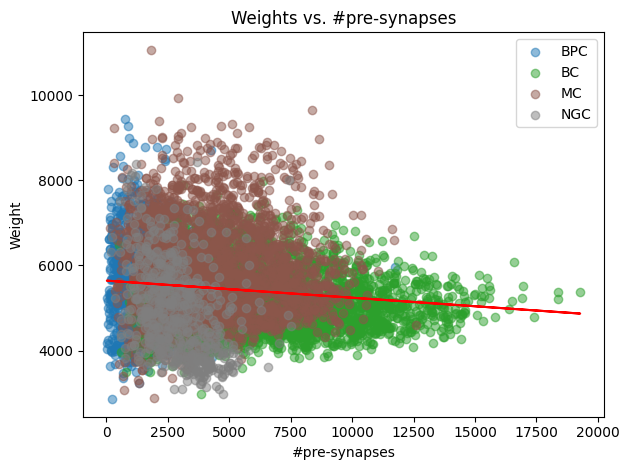

In [72]:
weight_v_num_of_pre(neurons_df[neurons_df['clf_type'] == 'I'], color='cell_type')